# Date Functionality in Pandas

In [1]:
import pandas as pd
import numpy as np

## Timestamp

In [2]:
pd.Timestamp('9/1/2016 10:05am')

Timestamp('2016-09-01 10:05:00')

### Period (Span of time) 

In [3]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [4]:
pd.Period('1/5/2016')

Period('2016-01-05', 'D')

### Datetiimeindex

In [6]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-13')])
t1

2016-09-01    a
2016-09-02    b
2016-09-13    c
dtype: object

In [7]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [9]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [10]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

## Converting to Datetime

In [12]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '9/12/16']
ta3 = pd.DataFrame(np.random.randint(10, 106, [4,2]), index=d1, columns=list('ab'))
ta3

,a,b
2 June 2013,81,90
"Aug 29, 2014",105,17
2015-06-26,41,37
9/12/16,28,67


In [13]:
ta3.index = pd.to_datetime(ta3.index)
ta3

,a,b
2013-06-02,81,90
2014-08-29,105,17
2015-06-26,41,37
2016-09-12,28,67


In [14]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

## Time deltas -- differences in times

In [15]:
pd.Timestamp('9/3/2016') - pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [17]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

## Working with Dates in a Dataframe

In [18]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [19]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5,10,9).cumsum(), 
                  'Count 2': 120 + np.random.randint(-5,10,9)}, index = dates)
df

,Count 1,Count 2
2016-10-02,104,126
2016-10-16,109,122
2016-10-30,113,128
2016-11-13,121,122
2016-11-27,121,118
2016-12-11,130,129
2016-12-25,134,127
2017-01-08,131,125
2017-01-22,129,126


In [23]:
df.index.weekday_name

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

In [22]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,5.0,-4.0
2016-10-30,4.0,6.0
2016-11-13,8.0,-6.0
2016-11-27,0.0,-4.0
2016-12-11,9.0,11.0
2016-12-25,4.0,-2.0
2017-01-08,-3.0,-2.0
2017-01-22,-2.0,1.0


In [24]:
df.resample('N').mean()

MemoryError: Unable to allocate 68.8 PiB for an array with shape (9676800000000002,) and data type int64

In [25]:
df['2017']

,Count 1,Count 2
2017-01-08,131,125
2017-01-22,129,126


In [26]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,130,129
2016-12-25,134,127
2017-01-08,131,125
2017-01-22,129,126


In [27]:
df.asfreq('W', method = 'ffill')

,Count 1,Count 2
2016-10-02,104,126
2016-10-09,104,126
2016-10-16,109,122
2016-10-23,109,122
2016-10-30,113,128
2016-11-06,113,128
2016-11-13,121,122
2016-11-20,121,122
2016-11-27,121,118
2016-12-04,121,118


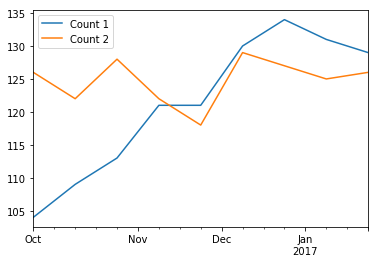

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()